# Pokemon Grass vs water vs Fire Classifier

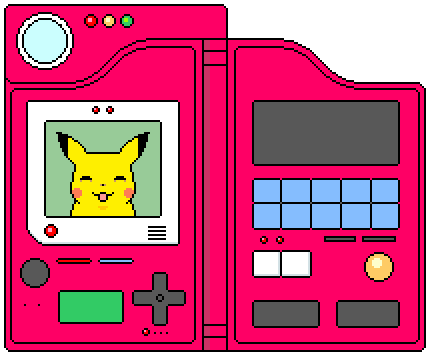

### importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras as ks

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

### Reading the csv file

In [2]:
df = pd.read_csv('../input/pokemon-images-and-types/pokemon.csv')
df.shape

(809, 3)

### there is not much information left in the provided csv as it consist of a long list of pokemons but only a few information about those pokemons

In [3]:
df.head(3)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison


### lets sort the pokemons names in order to keep in match with the available image files

In [4]:
df2 = df.sort_values(by=['Name'], ascending=True).reset_index(drop=True)

In [5]:
df2.head(5)

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


### Lets combine type1 and type2 to visualize what are all the major types of the given pokemons capabilities available

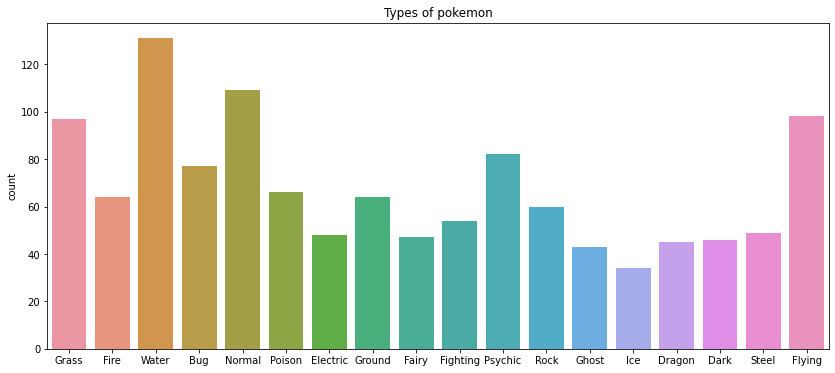

In [6]:
type1 = df['Type1'].tolist()
type2 = df['Type2'].tolist()

typo = type1 + type2

plt.figure(figsize=(14, 6))

sns.countplot(x=typo)
plt.title('Types of pokemon')
plt.show()

In [7]:
x1 = df.Type1.value_counts().keys()
y1 = df.Type1.value_counts().values
x2 = df.Type2.value_counts().keys()
y2 = df.Type2.value_counts().values

In [8]:
xy1 = pd.DataFrame({'x1':x1, 'y1':y1})
xy2 = pd.DataFrame({'x2':x2, 'y2': y2})
xy1.sort_values(by=['x1'],ascending=True, inplace=True)
xy2.sort_values(by=['x2'],ascending=True, inplace=True)

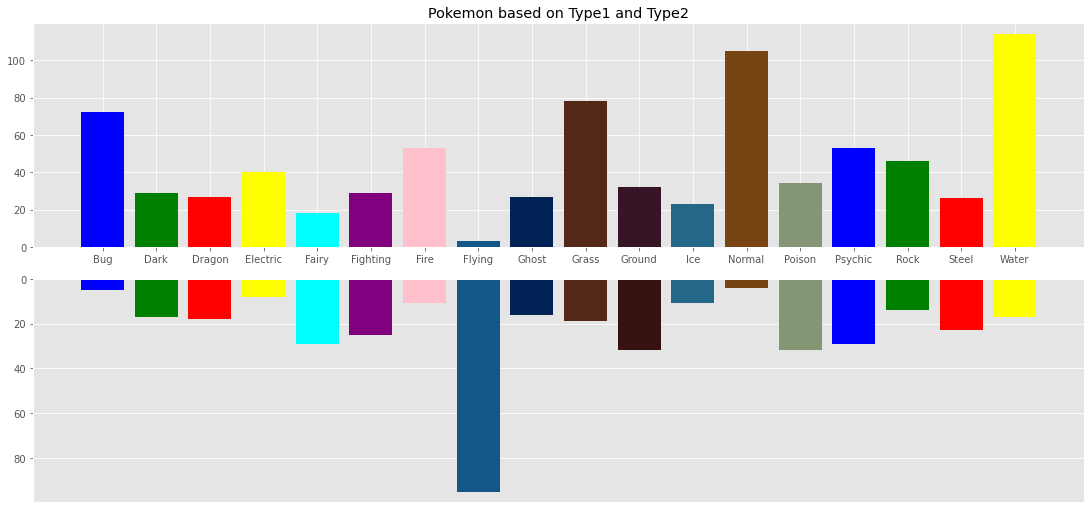

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 7))
gspec = gridspec.GridSpec(2, 2)
tp = plt.subplot(gspec[0, 1])
bt = plt.subplot(gspec[1, 1:])

tp.bar(xy1.x1,xy1.y1, color=['blue', 'green', 'red',
                             'yellow', 'cyan', 'purple',
                             'pink', '#135688', '#002255',
                             '#532819', '#381526', '#256789',
                            '#784512', '#859674'])
bt.bar(xy2.x2, xy2.y2, color=['blue', 'green', 'red',
                             'yellow', 'cyan', 'purple',
                             'pink', '#135688', '#002255',
                             '#532819', '#381111', '#256789',
                            '#784512', '#859674'])
bt.invert_yaxis()
bt.set_xticks([])
plt.tight_layout()
tp.set_title('Pokemon based on Type1 and Type2')
plt.show()

### by viewing the above visual we may consider that we have pretty all pokemons types where grass, water, psychic, flying and normal types are appealing.

## The above two plots shows the type1 and type2 individually in which we can get some point about the pokemons abilities.
#### Grass , fire , water, normal and bug are the base type of most of the pokemons and the secondary ability of most of the pokemons are flying where as only few pokemons have the base ability of flying and only few pokemons have other secondary ability

### lets view some of the provided pokemon images

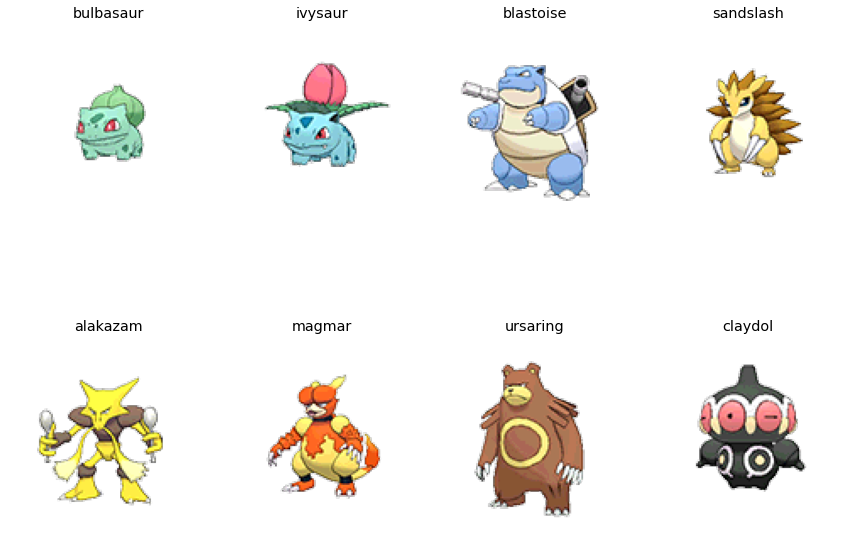

In [10]:
path = '../input/pokemon-images-and-types/images/images/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
    

### getting all the image path into a dataframe 

In [11]:
path='../input/pokemon-images-and-types/images/images/'
img_name = sorted(os.listdir('../input/pokemon-images-and-types/images/images/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)

In [12]:
df2['filepath'] = img_paths

In [13]:
poke_type = []
code = []

for i in range(df2.shape[0]):
    if (df2.iloc[i]['Type1']=='Grass') or (df2.iloc[i]['Type2']=='Grass'):
        poke_type.append('Grass')
        code.append(1)
    elif (df2.iloc[i]['Type1']=='Water') or (df2.iloc[i]['Type2']=='Water'):
        poke_type.append('Water')
        code.append(2)
    elif (df2.iloc[i]['Type1']=='Fire') or (df2.iloc[i]['Type2']=='Fire'):
        poke_type.append('Fire')
        code.append(3)
    else:
        poke_type.append('NaN')
        code.append('NaN')

In [14]:
df2['type'] = poke_type
df2['code'] = code
new_df = df2.drop(['Type1', 'Type2', 'Name'], axis=1)
new_df = new_df[new_df['type']!='NaN']
new_df.reset_index(drop=True, inplace=True)


In [15]:
new_df.head(2)

,filepath,type,code
0,../input/pokemon-images-and-types/images/image...,Grass,1
1,../input/pokemon-images-and-types/images/image...,Water,2


Text(0, 0.5, 'Number of images')

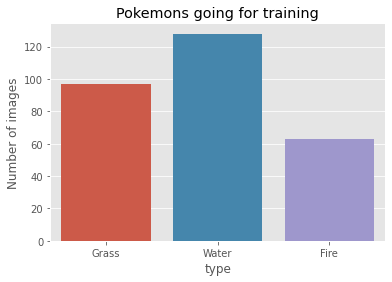

In [16]:
sns.countplot(x=new_df.type)
plt.title('Pokemons going for training')
plt.ylabel('Number of images')

## Augmentation

In [17]:
train_datagen = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    new_df, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    new_df , x_col='filepath', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 260 validated image filenames belonging to 3 classes.
Found 28 validated image filenames belonging to 3 classes.


## Image sample for which trainings gonna take place

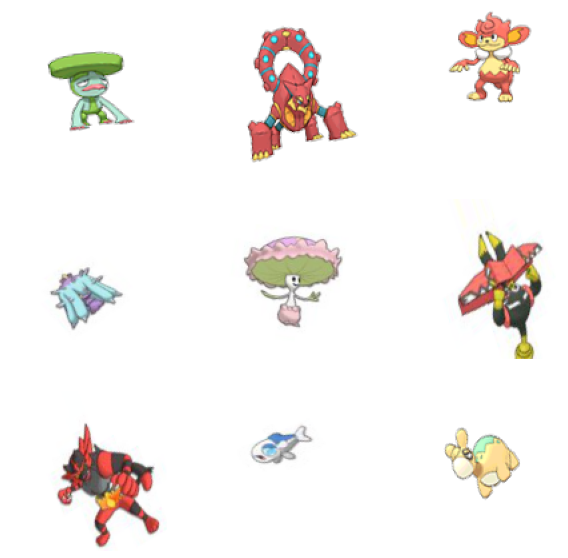

In [18]:
image_sample = train_generator.next()[0]

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

## Model

In [19]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Conv2D(256, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120, 120, 4)       20        
_________________________________________________________________
conv2d (Conv2D)              (None, 114, 114, 64)      12608     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 256)       1605888   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 256)         0

In [21]:
model.layers

### Creating a callback to stop the training when a particular accuarcy is reached

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.7) and (logs.get('val_acc')>0.7):
            print('\n reached 70% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()


In [23]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
    
)


Epoch 1/100
9/9 [==============================] - 7s 429ms/step - loss: 1.3679 - acc: 0.2945 - val_loss: 1.0911 - val_acc: 0.4286
Epoch 2/100
9/9 [==============================] - 2s 171ms/step - loss: 1.0905 - acc: 0.4346 - val_loss: 1.0817 - val_acc: 0.4286
Epoch 3/100
9/9 [==============================] - 2s 176ms/step - loss: 1.0778 - acc: 0.4541 - val_loss: 1.0618 - val_acc: 0.4286
Epoch 4/100
9/9 [==============================] - 2s 187ms/step - loss: 1.0937 - acc: 0.4001 - val_loss: 1.0625 - val_acc: 0.4286
Epoch 5/100
9/9 [==============================] - 2s 169ms/step - loss: 1.0638 - acc: 0.4371 - val_loss: 1.0408 - val_acc: 0.4286
Epoch 6/100
9/9 [==============================] - 2s 204ms/step - loss: 1.0399 - acc: 0.4284 - val_loss: 0.9613 - val_acc: 0.4286
Epoch 7/100
9/9 [==============================] - 2s 171ms/step - loss: 0.9817 - acc: 0.4519 - val_loss: 1.0204 - val_acc: 0.4286
Epoch 8/100
9/9 [==============================] - 2s 173ms/step - loss: 1.0122 - a

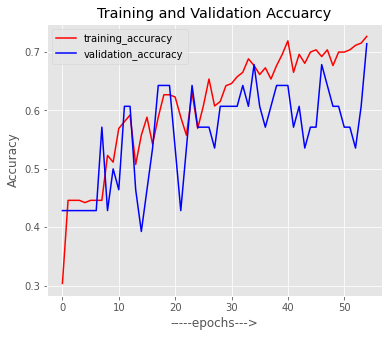

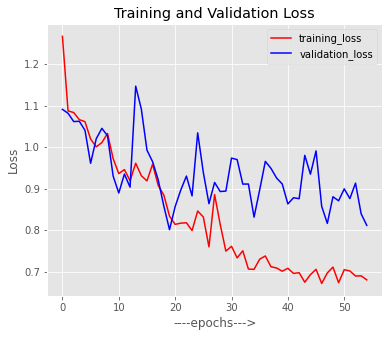

In [24]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()